<a href="https://colab.research.google.com/github/yuukimotai/KikagakuRyuu_Course/blob/main/kikagakuryuu_intermediate_section8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
%matplotlib inline
import pandas as pd
import numpy as np


df = pd.read_csv("housing.csv")
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


<ipython-input-74-e74ebefad6b3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['x1'])


<Axes: xlabel='x1', ylabel='Density'>

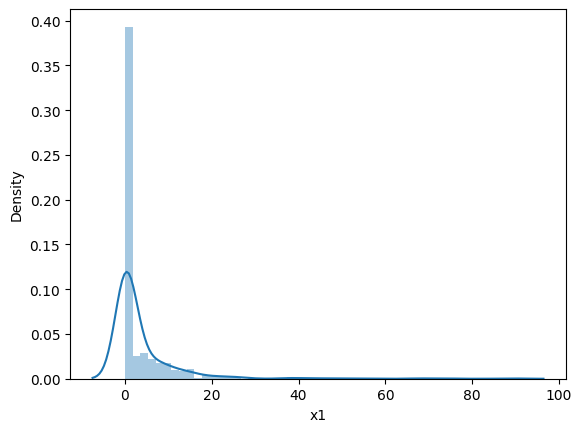

In [74]:
#分布の確認
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['x1'])

# 外れ値除去

In [75]:
 col = 'x6'
 col

'x6'

In [76]:
mean = df.mean()# 平均
print(mean[col])

6.284634387351779


In [77]:
# 標準偏差 standard deviation
sigma = df.std()
print(sigma)

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64


In [78]:
# 3σのアッパーとローワー
lower = mean[col] - 3 * sigma[col]
upper = mean[col] + 3 * sigma[col]
print(lower)
print(upper)

4.176782957105809
8.392485817597748


In [79]:
df2 = df[(df[col]>lower) & (df[col]<upper)]
len(df2)

498

<ipython-input-80-68e750fa8fe2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['x6'])


<Axes: xlabel='x6', ylabel='Density'>

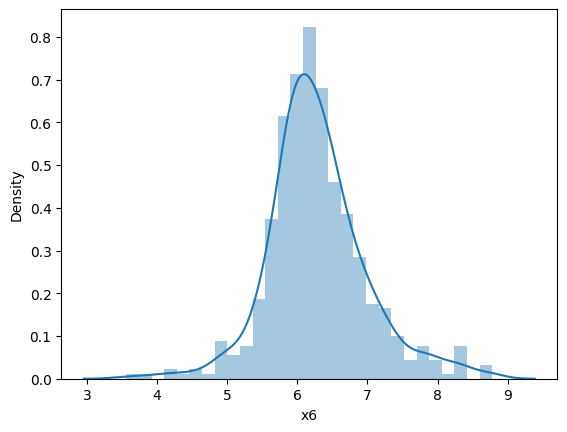

In [80]:
# 分布の確認
sns.distplot(df['x6'])

<ipython-input-81-4544f9010ddb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['x6'])


<Axes: xlabel='x6', ylabel='Density'>

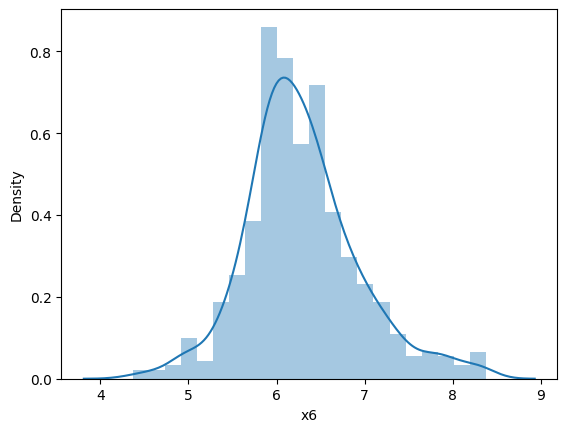

In [81]:
sns.distplot(df2['x6'])

In [82]:
cols = df.columns

In [83]:
_df = df
for col in cols:
  low = mean[col] - 3 * sigma[col]
  high = mean[col]  + 3 * sigma[col]
  _df = _df[(_df[col]>low) & (_df[col]<high)]

In [84]:
len(df)

506

In [85]:
len(_df)

415

サンプルが減る場合の対処

- 外れ値は取り除く
- 外れ値を平均・中央値などで埋める
- 主成分分析等を使って、潜在変数に変換した後に3σ法を適用→高度

# 入力変数と出力変数に分割

In [86]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [87]:
# df.iloc[行, 列]
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

In [89]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=1)

#重回帰分析

In [90]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [94]:
# 検証
model.score(Xtrain, ytrain) # 学習用

0.7972109224535133

In [93]:
# 検証
model.score(Xtest, ytest) # テスト用 過学習

0.6253776004329588

# スケーリング

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scalerの学習　平均・標準差の計算
scaler.fit(Xtrain)

StandardScaler()

In [97]:
# scaling
Xtrain2 = scaler.transform(Xtrain)
Xtest2 = scaler.transform(Xtest)
print(Xtrain2)
print("--------------------")
print(Xtest2)

[[-0.44982613 -0.47117023 -0.01455847 ...  0.3716043   0.06655172
  -0.73371428]
 [-0.45396528 -0.47117023 -0.7386746  ...  0.3716043   0.38053452
  -0.32783019]
 [-0.19959841 -0.47117023  1.29482264 ... -1.75496677 -0.18177662
  -0.75722108]
 ...
 [ 0.49446336 -0.47117023  1.07385525 ...  0.84417564  0.27992872
  -0.12097034]
 [-0.45659855  0.61013288 -0.5893723  ...  0.08806149  0.44754069
  -0.88259069]
 [-0.47327932 -0.47117023 -0.7386746  ...  0.3716043   0.44754069
  -0.54095851]]
--------------------
[[ 2.42729712 -0.47117023  1.07385525 ...  0.84417564  0.18530905
   0.13917159]
 [-0.45474875 -0.47117023 -0.35048863 ...  1.17497559  0.42378923
   1.00892322]
 [-0.46182643 -0.47117023 -0.04740498 ...  0.08806149  0.44754069
  -0.2118633 ]
 ...
 [ 0.81140192 -0.47117023  1.07385525 ...  0.84417564 -1.37031545
   1.86143653]
 [-0.38089512  0.61013288 -1.03578616 ... -2.55833806  0.28282524
  -0.77759364]
 [ 2.34176675 -0.47117023  1.07385525 ...  0.84417564 -5.2734731
   0.4619983

In [98]:
# model宣言
model = LinearRegression()
model.fit(Xtrain2, ytrain)

LinearRegression()

In [99]:
# 訓練用データ検証
model.score(Xtrain2, ytrain)

0.7972109224535133

In [100]:
#テスト用データ検証
model.score(Xtest2, ytest)

0.6253776004329596

In [103]:
#重みの確認
model.coef_

array([-0.2 ,  0.21,  0.51, -0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

In [102]:
np.set_printoptions(precision=2, suppress=True)

<ipython-input-104-9285135d277a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(_df['x6'])


<Axes: xlabel='x6', ylabel='Density'>

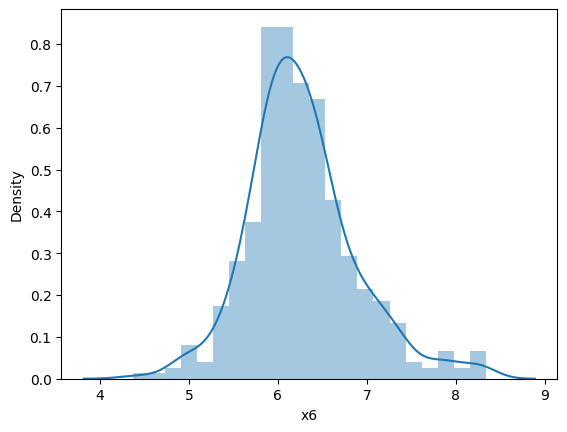

In [104]:
sns.distplot(_df['x6'])